In [1]:
library(brms)
library(rstan)
library(tidyverse)

Loading required package: Rcpp

Loading 'brms' package (version 2.15.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: ‘brms’


The following object is masked from ‘package:stats’:

    ar


Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.2, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract() masks rstan::extract()
✖ 

In [2]:
parallel::detectCores()

[1] 4

In [5]:
age <- c(rep("lt65", 10521), rep("Older", 3552),
         rep("lt65", 10551), rep("Older", 3585))
treatment <- c(rep("Placebo", 10521), rep("Placebo", 3552),
               rep("Vaccine", 10551), rep("Vaccine", 3585))
tested <- c(rep("Pos", 156), rep("Neg", 10521-156),
            rep("Pos", 29), rep("Neg", 3552-29),
            rep("Pos", 7),  rep("Neg", 10551-7),
            rep("Pos", 4),  rep("Neg", 3585-4))
moderna_tb <- tibble(age = age, tested = tested,treatment = treatment)

In [6]:
moderna_bf <- brm(data = moderna_tb,
                   family = bernoulli(link = logit),
                   tested ~ age + treatment + age:treatment ,
                   iter = 12500, warmup = 500, chains = 3, cores = 3,
                   control = list(adapt_delta = .99, max_treedepth = 12),
                   seed = 9,file = "moderna_age")

Compiling Stan program...

Start sampling



In [7]:
summary(moderna_bf)

 Family: bernoulli 
  Links: mu = logit 
Formula: tested ~ age + treatment + age:treatment 
   Data: moderna_tb (Number of observations: 28209) 
Samples: 3 chains, each with iter = 12500; warmup = 500; thin = 1;
         total post-warmup samples = 36000

Population-Level Effects: 
                          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS
Intercept                    -4.20      0.08    -4.36    -4.04 1.00    34844
ageOlder                     -0.62      0.21    -1.03    -0.22 1.00    17778
treatmentVaccine             -3.17      0.39    -4.02    -2.46 1.00    11015
ageOlder:treatmentVaccine     1.07      0.69    -0.35     2.40 1.00    13444
                          Tail_ESS
Intercept                    25557
ageOlder                     18380
treatmentVaccine             11995
ageOlder:treatmentVaccine    16253

Samples were drawn using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduc

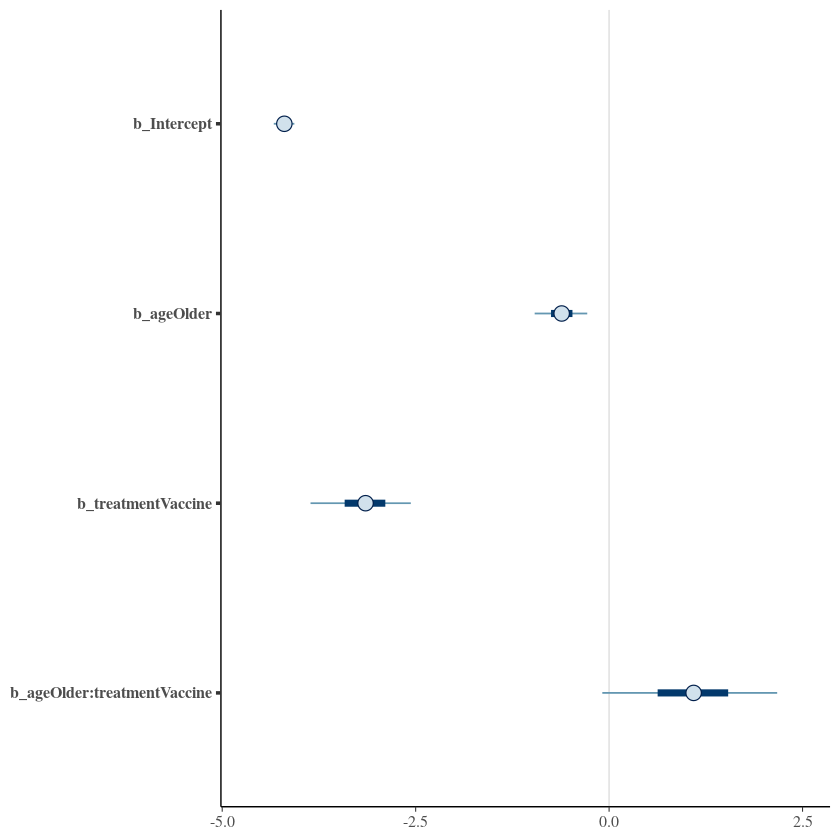

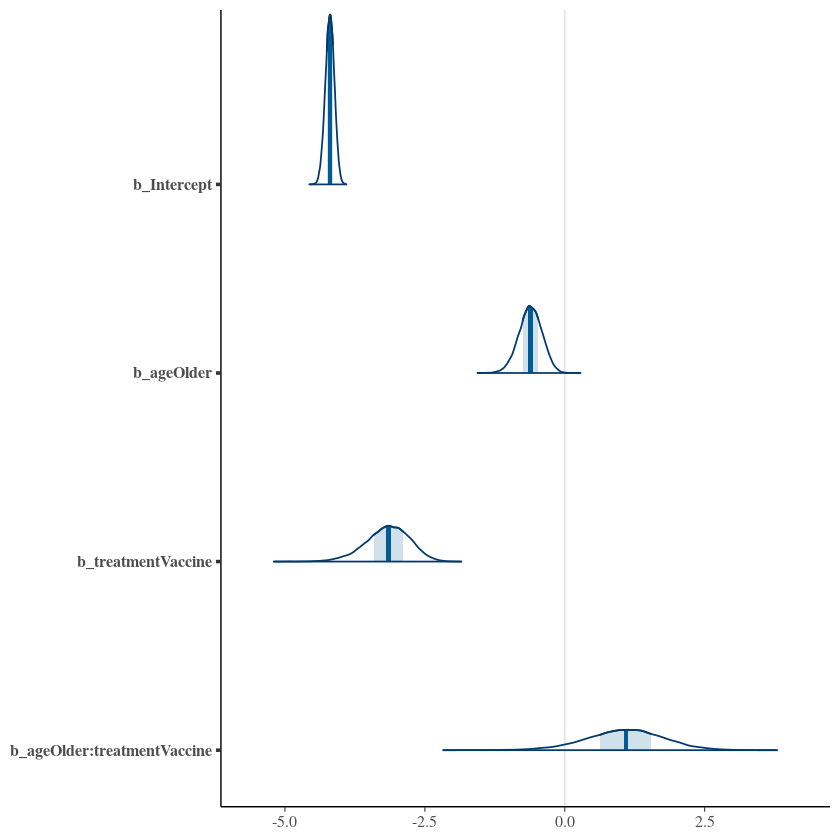

In [10]:
mcmc_plot(moderna_bf)
mcmc_plot(moderna_bf, type='areas')

In [11]:
bayestestR::describe_posterior(moderna_bf,
                               ci=0.95,
                               test=c("p_direction"),
                               centrality="MAP")

,Parameter,MAP,CI,CI_low,CI_high,pd,Rhat,ESS
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,b_Intercept,-4.1927538,0.95,-4.3571919,-4.0419679,1.0000000,1.000074,34844.25
1,b_ageOlder,-0.6298735,0.95,-1.0126313,-0.2068343,0.9993333,1.000021,17646.01
4,b_treatmentVaccine,-3.1474601,0.95,-3.9731362,-2.4292688,1.0000000,1.000178,10636.12
2,b_ageOlder.treatmentVaccine,1.1174827,0.95,-0.2473121,2.4922334,0.9367778,1.000183,13415.18
